<a href="https://colab.research.google.com/github/pranabeshdash/EVA7-Phase1-Session2.5-PyTorch101/blob/main/EVA7_Phase1_Session2_5Pytorch101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Custom Neural Network design for detecing MNIST data and SUM of Random Number + MNIST detected Data 


Neural Network to be designed

Inputs : MNIST data and Random Number (0-9)

Outputs : MNIST data and SUM of MNIST + Random Number

## **Import Libraries**

In [1]:
# Importing required modules ( torch, optimizer and nn module)
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, TensorDataset
from torch.utils.data import DataLoader

import torch.nn.functional as F
import torch.optim as optim


import matplotlib.pyplot as plt
import numpy as np
import random

# RUN on CUDA ( GPU ) if available


In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


# Download MNIST Train and Test Dataset

MNIST Dataset contains 70,000 images of handwritten digits: 60,000 for training and 10,000 for testing. The images are grayscale, 28x28 pixels
We transform images to Tensors since pytorch deals with Tensor data


In [3]:
# Train set
mnist_train_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences
    ])
)

print("Training set size",len(mnist_train_set))

mnist_test_set = torchvision.datasets.MNIST(
    root='./data'
    ,train=False
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences
    ])
)

print("Testing set size",len(mnist_test_set))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training set size 60000
Testing set size 10000


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Creating Custom Dataset to read both MNSIT and random numbers

In [4]:
class MNISTRandomDataset(Dataset):
  def __init__(self, MNIST_dataset):
    self.MNIST_dataset = MNIST_dataset

  def __getitem__(self, index):
    image, label = self.MNIST_dataset[index]
    randNum = random.randint(0,9)

    #Creating one hot encoding for random number 
    one_hot_randNumber = F.one_hot(torch.arange(0, 10)) # used from https://stackoverflow.com/questions/62456558/is-one-hot-encoding-required-for-using-pytorchs-cross-entropy-loss-function

    #add actual label and random number
    sum_label = label + randNum
    return image, label, one_hot_randNumber[randNum], sum_label

  def __len__(self):
    return len(self.MNIST_dataset)

# Training Set and Testing Set

In [5]:
train_data_set = MNISTRandomDataset(mnist_train_set)
test_data_set = MNISTRandomDataset(mnist_test_set)

In [6]:
dataset  = MNISTRandomDataset(mnist_train_set)
next(iter(dataset))

(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.424

# DataLoader for batch training and testing


In [7]:
train_Dataloader = DataLoader(train_data_set,batch_size=256,shuffle=True)
test_Dataloader = DataLoader(test_data_set,batch_size=256)

In [8]:
# Checking the dataset
batch = next(iter(train_Dataloader))
image, label, random_num, sum_label = batch
print(image.shape,label,random_num, sum_label)

torch.Size([256, 1, 28, 28]) tensor([5, 4, 8, 7, 2, 0, 8, 1, 0, 2, 7, 8, 9, 0, 5, 4, 1, 5, 5, 8, 3, 6, 4, 5,
        1, 6, 0, 6, 3, 0, 3, 8, 4, 5, 7, 9, 6, 0, 2, 3, 6, 2, 9, 6, 8, 4, 0, 9,
        0, 9, 8, 1, 7, 0, 8, 7, 7, 6, 8, 9, 6, 1, 9, 9, 1, 3, 7, 3, 9, 4, 4, 2,
        7, 1, 2, 4, 9, 5, 6, 7, 4, 5, 4, 5, 7, 6, 6, 1, 4, 9, 3, 3, 0, 1, 4, 8,
        5, 4, 9, 9, 0, 5, 7, 7, 9, 4, 4, 6, 6, 2, 4, 4, 3, 5, 5, 3, 1, 5, 2, 2,
        2, 2, 0, 6, 8, 9, 1, 0, 2, 7, 7, 3, 7, 2, 1, 9, 4, 0, 7, 5, 8, 0, 2, 2,
        8, 0, 5, 8, 7, 0, 7, 7, 1, 3, 0, 2, 2, 6, 5, 6, 3, 7, 9, 6, 4, 8, 6, 1,
        9, 6, 0, 0, 1, 6, 6, 0, 7, 1, 1, 0, 2, 9, 4, 0, 9, 4, 8, 0, 6, 1, 9, 3,
        0, 3, 4, 1, 3, 9, 3, 9, 7, 1, 1, 9, 0, 5, 9, 2, 5, 9, 5, 6, 2, 9, 4, 7,
        9, 3, 7, 8, 0, 4, 3, 9, 9, 0, 3, 6, 1, 6, 8, 2, 7, 5, 1, 8, 2, 2, 7, 4,
        1, 6, 8, 1, 3, 6, 2, 9, 3, 1, 8, 9, 3, 3, 2, 2]) tensor([[0, 0, 1,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 1, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,

MNIST and RANDOM NN Model

In [9]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        #Input: 28*28*1    Output:28 * 28 * 32    RF:3 * 3   (Receptive Field)
        self.conv1 = nn.Conv2d(in_channels=1,   out_channels=32,  kernel_size=3, padding=1)
        #Input: 28*28*32   Output:28 * 28 * 64    RF:5 * 5
        self.conv2 = nn.Conv2d(in_channels=32,  out_channels=64,  kernel_size=3, padding=1)      
        #Input: 28*28*64   Output:14 * 14 * 64    RF:10* 10
        self.max_pool1 = nn.MaxPool2d(2, 2)
        #Input: 14*14*64   Output:14 * 14 * 64   RF:12*12
        self.conv3 = nn.Conv2d(in_channels=64,  out_channels=64, kernel_size=3, padding=1)
        #Input: 14*14*64   Output:14 * 14 * 64   RF:14*14
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        #Input: 14*14*64   Output: 7 * 7 * 64    RF:28*28
        self.max_pool2 = nn.MaxPool2d(2, 2)
        #Input: 7*7*64     Output: 5 * 5 * 64    RF:30*30
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        #Input: 5*5*64     Output: 3 * 3 * 128    RF:32*32                   
        self.conv6 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        #Input: 3*3*128    Output: 1 * 1 * 10     RF:34*34                  
        self.conv7 = nn.Conv2d(in_channels=128, out_channels=10,  kernel_size=3)                 

        # concatenate MNIST output and Random number input layer
        self.fc1 = nn.Linear(in_features=20,  out_features=128)    
        # Total of 19 outputs for MNIST + Random output layer i.e (0 - 18)           
        self.fc2 = nn.Linear(in_features=128, out_features=19)     

    def forward(self, x, rand_num):
        # First conv1 layer till max_pool-1
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.max_pool1(x)

        # Second conv layer till max_pool
        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = self.max_pool2(x)

        # Third conv layer
        x = self.conv5(x)
        x = F.relu(x)
        x = self.conv6(x)
        x = F.relu(x)
        x = self.conv7(x)

        # The Output of 7th layer is 1x1x10 and it is concatinated with random_number layer for output
        # Flatten the x layer
        x = torch.flatten(x,1)
        new_x = torch.cat((x, rand_num), dim=1)

        # Now connect with forward connecting layers to get two outputs
        new_x = F.relu(self.fc1(new_x)) 
        new_x = self.fc2(new_x)

        # Use softmax fucntion to get output probs in range of 0 -1 
        return F.log_softmax(x, dim = 1), F.log_softmax(new_x, dim = 1)

Testing Network


In [10]:
model = Network()
# Run model on GPU
model.to(device)
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 220,125 trainable parameters


Testing Parameters
1. Accuracy

In [11]:
def accuracy(outputs, labels):
    """
    Calculates the accuracy.
    """
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

#Training and Testing

In [12]:
def train(model, device, train_loader, optimizer, epoch):

    epoch_loss = 0

    # run for all the data in train_Dataloader
    for batch_index, (image, label, random_number, label_sum) in enumerate(train_loader):

        image, label, random_number, label_sum = image.to(device), label.to(device),random_number.to(device), label_sum.to(device)

        optimizer.zero_grad()

        mnist_output, sum_output = model(image,random_number)

        mnist_loss = F.cross_entropy(mnist_output, label)
        sum_loss = F.cross_entropy(sum_output, label_sum)
        loss= (mnist_loss + sum_loss)/2

        epoch_loss += loss.item()

        loss.backward()

        optimizer.step()
    print('Train set: Average loss: {:.4f}'.format(loss.item()))

    train_loss = epoch_loss / len(train_loader)
    return train_loss

In [13]:
def test(model, device, test_loader,test_type='Test'):

    test_loss = 0
    
    correct_mnist = 0
    correct_addition = 0

    # turn off gradients during the testing
    with torch.no_grad():
        for (image, label, random_number, label_sum) in test_loader:

            image, label,random_number, label_sum = image.to(device), label.to(device), random_number.to(device),label_sum.to(device)

            mnist_output, sum_output = model(image,random_number)

            # Use cross-entropy loss for both outputs. Smaller the loss better the model.
            # Cross entropy loss is a logarithmin loss function
            # Large losses are penalized with higher probabilities. 
            test_loss += (F.cross_entropy(mnist_output, label) + F.cross_entropy(sum_output, label_sum))/2

            mnist_pred = mnist_output.argmax(dim=1, keepdim=True)
            addition_pred = sum_output.argmax(dim=1, keepdim=True)

            # increment the correct prediction count if pred is correct
            correct_mnist += mnist_pred.eq(label.view_as(mnist_pred)).sum().item()
            correct_addition += addition_pred.eq(label_sum.view_as(addition_pred)).sum().item()


    # test loss divided by the total number of items in test dataset
    test_loss /= len(test_loader.dataset)
    print(f'{test_type} set: Average loss: {test_loss:.3f}, MNIST Accuracy:{100. * correct_mnist/len(test_loader.dataset)}, Addition_Accuracy:{100. * correct_addition/len(test_loader.dataset)}')

    return test_loss

In [17]:
# move the model to the specified device
model = Network().to(device)

# use Stochastic Gradient Descent as the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# set the number of epochs to train for
num_epoch = 5

train_loss_values = []
test_loss_values = []

# run it for epoch number of times
for epoch in range(1, num_epoch+1):
    print('\nEpoch {} : '.format(epoch))
    # train the model
    train_loss = train(model, device, train_Dataloader, optimizer, epoch)
    test_loss  = test(model, device, test_Dataloader)
    # test the model

    train_loss_values.append(train_loss)
    test_loss_values.append(test_loss)


Epoch 1 : 
Train set: Average loss: 1.0291
Test set: Average loss: 0.004, MNIST Accuracy:98.64, Addition_Accuracy:47.55

Epoch 2 : 
Train set: Average loss: 0.4468
Test set: Average loss: 0.002, MNIST Accuracy:98.96, Addition_Accuracy:94.08

Epoch 3 : 
Train set: Average loss: 0.1227
Test set: Average loss: 0.001, MNIST Accuracy:99.24, Addition_Accuracy:98.94

Epoch 4 : 
Train set: Average loss: 0.0586
Test set: Average loss: 0.000, MNIST Accuracy:99.33, Addition_Accuracy:99.12

Epoch 5 : 
Train set: Average loss: 0.0854
Test set: Average loss: 0.000, MNIST Accuracy:99.3, Addition_Accuracy:99.16


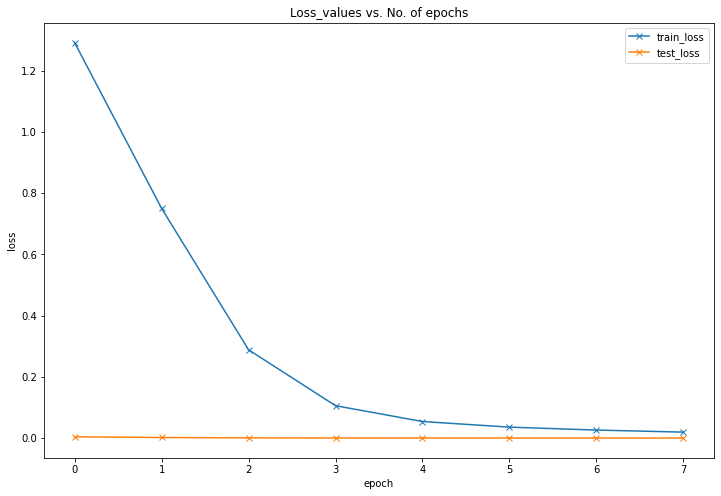

In [16]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.figure(figsize=(12, 8))
plt.plot(train_loss_values, '-x')
plt.plot(test_loss_values, '-x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train_loss', 'Test_loss'])
plt.title('Loss vs. No. of epochs')
plt.savefig('Loss.png');